In [2]:
!pip install TextBlob

In [3]:
!pip install WordCloud

In [4]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv("Sentiment_Analysis .csv")

In [6]:
def get_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'positive'
    elif analysis.sentiment.polarity<0:
        return 'negative'
    else:
        return 'neutral' 

In [7]:
# apply sentiment analysis 
data["sentiment"]=data["Sentences"].apply(get_sentiment)

In [8]:
# filter out the negative reviews 
negative_reviews=data[data["sentiment"]=="negative"]

In [9]:
# combine all negative sentences into one string 
all_negative_text=" ".join(negative_reviews["Sentences"])

In [10]:
# Create the Word Cloud for negative reviews
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_text)


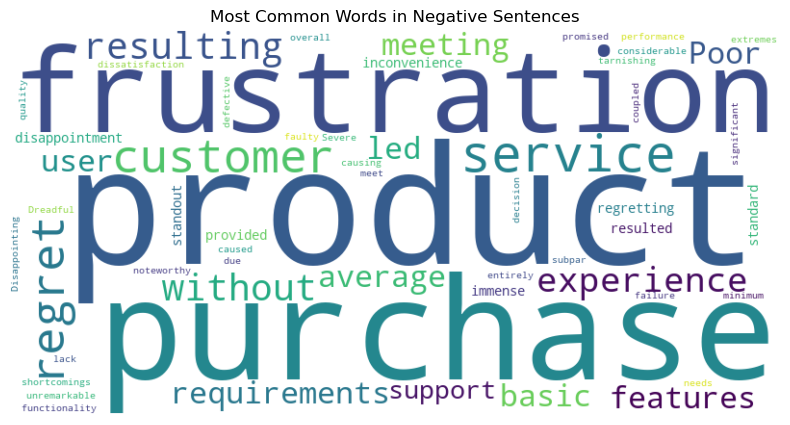

In [11]:
# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Negative Sentences')
plt.axis('off')
plt.show()


In [13]:
data.to_csv("sentiment_analysis.csv",index=False)